In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = "../data/raw_data/Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
df.columns = df.columns.str.capitalize()

In [7]:
list(df.columns)

['Customerid',
 'Gender',
 'Seniorcitizen',
 'Partner',
 'Dependents',
 'Tenure',
 'Phoneservice',
 'Multiplelines',
 'Internetservice',
 'Onlinesecurity',
 'Onlinebackup',
 'Deviceprotection',
 'Techsupport',
 'Streamingtv',
 'Streamingmovies',
 'Contract',
 'Paperlessbilling',
 'Paymentmethod',
 'Monthlycharges',
 'Totalcharges',
 'Churn']

In [9]:
binary_cols = ["Gender","Partner","Dependents","Phoneservice","Paperlessbilling","Churn"]

df[binary_cols] = df[binary_cols].replace({
    "Yes":1,"No":0,
    "Male":1,"Female":0
})

In [10]:
df.head()

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## One Hot Encoding

In [11]:
multiple_cat_cols = ["Multiplelines","Internetservice","Onlinesecurity","Onlinebackup","Deviceprotection","Techsupport",
                     "Streamingtv","Streamingmovies","Contract","Paymentmethod"]

df = pd.get_dummies(df,columns = multiple_cat_cols,drop_first=True)

## Cleaning

In [13]:
df["Totalcharges"] = pd.to_numeric(df["Totalcharges"],errors="coerce")

In [14]:
df = df.drop("Customerid",axis = 1)

In [15]:
bool_cols = df.select_dtypes(include=bool).columns
df[bool_cols] = df[bool_cols].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 7043 non-null   int64  
 1   Seniorcitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   Tenure                                 7043 non-null   int64  
 5   Phoneservice                           7043 non-null   int64  
 6   Paperlessbilling                       7043 non-null   int64  
 7   Monthlycharges                         7043 non-null   float64
 8   Totalcharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Multiplelines_No phone service         7043 non-null   int64  
 11  Mult

## Correlation 

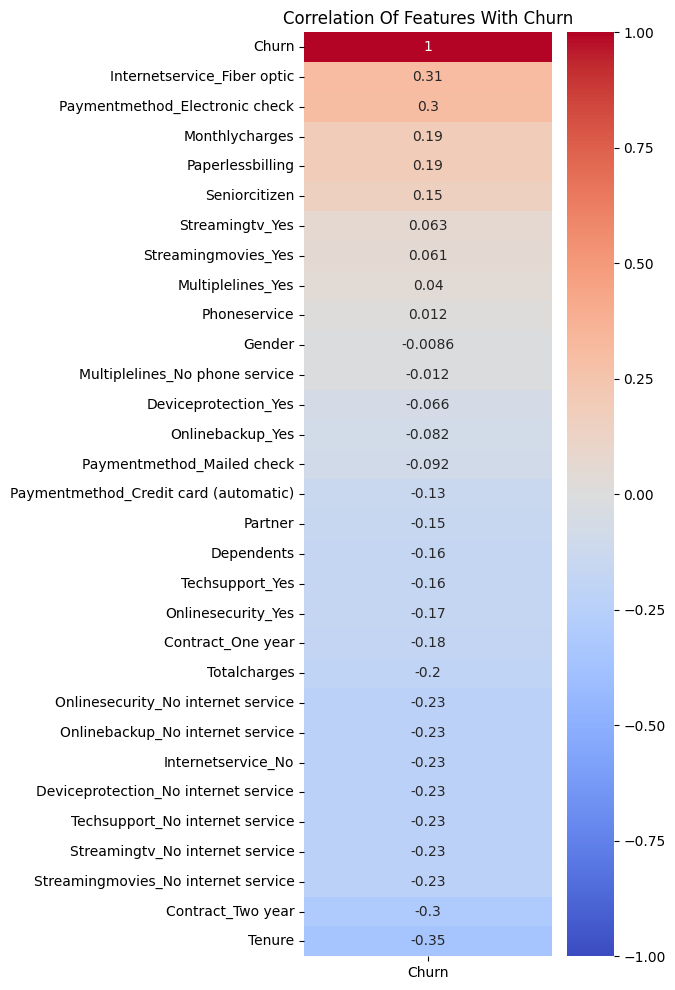

In [17]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix[["Churn"]].sort_values(by="Churn",ascending=False)

#Plot Heatmap
plt.figure(figsize=(4,12))
sns.heatmap(churn_corr,annot = True,cmap = "coolwarm",vmin = -1, vmax = 1)
plt.title("Correlation Of Features With Churn")
plt.show()

## Get rid of multicolinearity

In [19]:
df['No_internet_service'] = (
    df['Onlinesecurity_No internet service'] |
    df['Onlinebackup_No internet service'] |
    df['Deviceprotection_No internet service'] |
    df['Techsupport_No internet service'] |
    df['Streamingtv_No internet service'] |
    df['Streamingmovies_No internet service']
).astype(int)

In [20]:
drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

In [21]:
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Paperlessbilling,Monthlycharges,Totalcharges,Churn,...,Deviceprotection_Yes,Techsupport_Yes,Streamingtv_Yes,Streamingmovies_Yes,Contract_One year,Contract_Two year,Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,No_internet_service
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
if 'Multiplelines_No phone service' in df.columns:
    df['No_phone_service'] = df['Multiplelines_No phone service'].astype(int)
    df = df.drop(columns=['Multiplelines_No phone service'])

## Training Preparation

In [23]:
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 7043 non-null   int64  
 1   Seniorcitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   Tenure                                 7043 non-null   int64  
 5   Phoneservice                           7043 non-null   int64  
 6   Paperlessbilling                       7043 non-null   int64  
 7   Monthlycharges                         7043 non-null   float64
 8   Totalcharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Multiplelines_Yes                      7043 non-null   int64  
 11  Inte

In [28]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                                  feature          VIF
23                    No_internet_service          inf
11                     Internetservice_No          inf
5                            Phoneservice  1773.528816
7                          Monthlycharges   866.089640
10            Internetservice_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    Streamingmovies_Yes    24.156394
16                        Streamingtv_Yes    24.080019
8                            Totalcharges    10.811490
4                                  Tenure     7.584453
9                       Multiplelines_Yes     7.289761
14                   Deviceprotection_Yes     6.924754
13                       Onlinebackup_Yes     6.796678
15                        Techsupport_Yes     6.476508
12                     Onlinesecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         Paymentmethod_Electronic check     1.976032
22        

/Users/yakupcanergen/Projects/MachineLearningJobProjects/.ml_job_proj/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [29]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import time

In [31]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42,stratify=y)
THRESHOLD = 0.3

In [33]:
X_train.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Paperlessbilling,Monthlycharges,Totalcharges,Multiplelines_Yes,...,Techsupport_Yes,Streamingtv_Yes,Streamingmovies_Yes,Contract_One year,Contract_Two year,Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,No_internet_service,No_phone_service
3738,1,0,0,0,35,0,0,49.20,1701.65,0,...,0,1,1,0,0,0,1,0,0,1
3151,1,0,1,1,15,1,0,75.10,1151.55,0,...,0,0,0,0,0,0,0,1,0,0
4860,1,0,1,1,13,0,0,40.55,590.35,0,...,1,0,0,0,1,0,0,1,0,1
3867,0,0,1,0,26,1,1,73.50,1905.70,0,...,0,1,1,0,1,1,0,0,0,0
3810,1,0,1,1,1,1,0,44.55,44.55,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
)
rf_model.fit(X_train,y_train)
#Churn Class Probabilities
proba = rf_model.predict_proba(X_test)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)
print(classification_report(y_test,y_pred,digits = 3))

              precision    recall  f1-score   support

           0      0.883     0.771     0.823      1035
           1      0.531     0.717     0.610       374

    accuracy                          0.757      1409
   macro avg      0.707     0.744     0.716      1409
weighted avg      0.789     0.757     0.766      1409



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf_model.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.508   0.797   0.620   
0.3     0.531   0.717   0.610   
0.35    0.548   0.668   0.602   
0.4     0.571   0.615   0.592   
0.45    0.601   0.551   0.575   
0.5     0.625   0.489   0.549   


In [36]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 0.75 seconds
⏱ Prediction time: 0.0177 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.733     0.748      1409



In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

In [38]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_params = {
    'n_estimators' : 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample' : 0.8,
    'colsample_bytree' : 0.8,
    'random_state' : 42,
    'n_jobs' : -1,
    'scale_pos_weight' : scale_pos_weight,
    'eval_metric' : 'logloss'
}
# Training Timer
xgb = XGBClassifier(**xgb_params)
start_train = time.time()
xgb.fit(X_train,y_train)
training_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction Timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))





⏱ Training time: 0.75 seconds
⏱ Prediction time: 0.0110 seconds
              precision    recall  f1-score   support

           0      0.914     0.696     0.790      1035
           1      0.493     0.818     0.615       374

    accuracy                          0.728      1409
   macro avg      0.703     0.757     0.702      1409
weighted avg      0.802     0.728     0.744      1409



In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.463   0.832   0.595   
0.3     0.493   0.818   0.615   
0.35    0.507   0.797   0.620   
0.4     0.523   0.770   0.623   
0.45    0.532   0.730   0.616   
0.5     0.553   0.698   0.617   


In [40]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    proba = model.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)
    return recall_score(y_test,y_pred,pos_label= 1)

study = optuna.create_study(direction = "maximize")
study.optimize(objective,n_trials = 30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)
    


[I 2026-02-13 20:16:56,676] A new study created in memory with name: no-name-8673f01a-cf26-487f-ba1e-c88a39d19f13
[I 2026-02-13 20:16:57,047] Trial 0 finished with value: 0.8609625668449198 and parameters: {'n_estimators': 411, 'learning_rate': 0.13028485389177755, 'max_depth': 10, 'subsample': 0.7492439174814364, 'colsample_bytree': 0.5786533663470959, 'min_child_weight': 7, 'gamma': 2.0796263257535106, 'reg_alpha': 1.4591966784167547, 'reg_lambda': 3.685592482551611}. Best is trial 0 with value: 0.8609625668449198.
[I 2026-02-13 20:16:57,469] Trial 1 finished with value: 0.8743315508021391 and parameters: {'n_estimators': 576, 'learning_rate': 0.18240803816243809, 'max_depth': 9, 'subsample': 0.7049848251350476, 'colsample_bytree': 0.8776736093478479, 'min_child_weight': 10, 'gamma': 3.983873534795832, 'reg_alpha': 1.257113675636261, 'reg_lambda': 2.3466084220754038}. Best is trial 1 with value: 0.8743315508021391.
[I 2026-02-13 20:16:58,175] Trial 2 finished with value: 0.8850267379

Best Params: {'n_estimators': 364, 'learning_rate': 0.01109384141703132, 'max_depth': 5, 'subsample': 0.8564936714884042, 'colsample_bytree': 0.689007186826889, 'min_child_weight': 8, 'gamma': 3.701308207260727, 'reg_alpha': 3.4849089967912508, 'reg_lambda': 3.387809630185166}
Best Recall: 0.93048128342246


In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

best_model = XGBClassifier(**best_params)
start_train = time.time()
best_model.fit(X_train,y_train)
training_time = time.time() - start_train
print(f"⏱ Training time: {training_time:.2f} seconds")

start_pred = time.time()
proba = best_model.predict_proba(X_test)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.2f} seconds")

print(classification_report(y_test,y_pred,digits=3))



⏱ Training time: 0.52 seconds
⏱ Prediction time: 0.01 seconds
              precision    recall  f1-score   support

           0      0.957     0.561     0.708      1035
           1      0.434     0.930     0.592       374

    accuracy                          0.659      1409
   macro avg      0.696     0.746     0.650      1409
weighted avg      0.818     0.659     0.677      1409



In [43]:
import mlflow
from sklearn.metrics import classification_report, recall_score, precision_score,roc_auc_score
import time
import os

project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })
    mlflow.log_params(best_params)

    start_train = time.time()
    best_model = XGBClassifier(**best_params)
    best_model.fit(X_train,y_train)
    training_time = time.time() - start_train
    mlflow.log_metric("training_time",training_time)


    start_pred = time.time()
    proba = best_model.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("prediction_time",pred_time)

    precision = precision_score(y_test,y_pred,pos_label = 1)
    recall = recall_score(y_test,y_pred,pos_label = 1)
    f1 = f1_score(y_test,y_pred,pos_label = 1)
    auc = roc_auc_score(y_test,proba)

    mlflow.log_metric("precision",precision)
    mlflow.log_metric("recall",recall)
    mlflow.log_metric("f1_score",f1)
    mlflow.log_metric("auc_score",auc)

    mlflow.xgboost.save_model(best_model,"model")

    print(classification_report(y_test,y_pred,digits=3))


              precision    recall  f1-score   support

           0      0.957     0.561     0.708      1035
           1      0.434     0.930     0.592       374

    accuracy                          0.659      1409
   macro avg      0.696     0.746     0.650      1409
weighted avg      0.818     0.659     0.677      1409

